Silhouette Score (K-Means): 0.6756
Silhouette Score (GMM/EM): 0.6756
K-Means Inertia: 3.8164


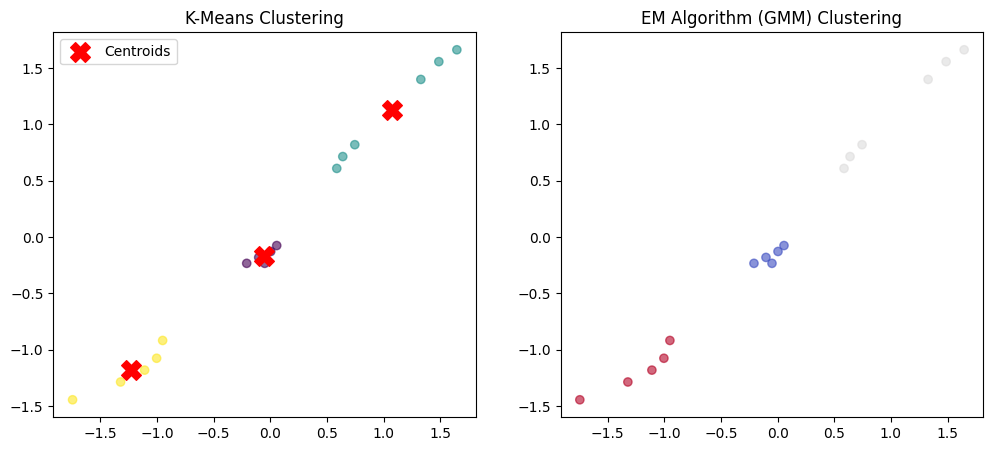

In [2]:
!pip install scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Load dataset from CSV file
file_path = "C:\\Users\\Krishna Reddy\\Desktop\\ML lab\\data.csv"
 # Change this to your actual CSV file path
df = pd.read_csv(file_path)

# Assume that all columns are features; adjust if needed
X = df.select_dtypes(include=[np.number]).values  

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
k = 3  # Change this based on dataset analysis
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Apply EM algorithm (Gaussian Mixture Model)
gmm = GaussianMixture(n_components=k, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

# Evaluate Clustering Quality using Silhouette Score
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
gmm_silhouette = silhouette_score(X_scaled, gmm_labels)

print(f"Silhouette Score (K-Means): {kmeans_silhouette:.4f}")
print(f"Silhouette Score (GMM/EM): {gmm_silhouette:.4f}")

# Compare Inertia (only for K-Means, not applicable for GMM)
print(f"K-Means Inertia: {kmeans.inertia_:.4f}")

# Visualizing the Clusters
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=gmm_labels, cmap='coolwarm', alpha=0.6)
plt.title('EM Algorithm (GMM) Clustering')

plt.show()
